*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

This notebook introduces the concept and methodology of implementing Bootstrap Simulation.

# Bootstrap Simulation

> **Bootstrap Simulation** is a non-parametric statistical technique to resample from known samples to estimate uncertainty in summary statistics. When there are small, limited number of samples, it gives a more accurate forecast model than directly obtaining a forecast model from the limited sample pool. It is non-parametric because it does not require any prior knowledge of the distribution (shape, mean, standard devation, etc..).

One goal of inferential statistics is to determine the value of a parameter of an entire population. It is typically too expensive or even impossible to measure this directly. So we use statistical sampling. We sample a population, measure a statistic of this sample, and then use this statistic to say something about the corresponding parameter of the population.

Bootstrapping is a type of resampling method to save time and money taking measurements. From a sample pool of size N, it picks a random value N times **with replacement**, and create M number of new Bootstrapped-sample pools. The term **with replacement** here means that you put back the sample you drew to the original sample pool after adding it to a new Bootstrapped-sample pool. Think of it this way: you randomly choose a file from a folder in your PC, and you *copy* and paste the randomly-chosen file into a new folder. You do not *cut* and paste the file, but you *copy* and paste the file into a new folder. You will have M number of folders, each containing N number of files.

Bootstrapping resamples the original sample pool to generate multiple smaller population of the true population. Each Bootstrap simulation is done by selecting a random value from the sample pool. For example, lets assume that you have the following sample pool of integers:
   
<p><center>Sample Integers = [12, 433, 533, 14, 65, 42, 64]</center></p>

From the sample pool of size N=7, you choose a random value N=7 times, and create a new sample pool of size N=7. In Bootstrap, each newly created sample pool is called a **realization**. You generate many of these realizations, and use them to calculate uncertainties in summary stats.

<p><center>Realization 1 = [12, 533, 533, 65, 12, 14, 42]</center></p>
<p><center>Realization 2 = [65, 14, 533, 65, 433, 64, 14]</center></p>
<p><center>Realization 3 = [433, 64, 533, 14, 14, 64, 12]</center></p>
<p><center>Realization 4 = [14, 65, 65, 433, 533, 12, 12]</center></p>

<div class="alert alert-info">
    <h4>Warning!</h4>
    <p>If your original sample size is N, each of your Bootstrap realization must have a size of N. Arbitrarily changing the size of your new Bootstrap sample pool will result in wrong confidence intervals for summary stats. Recall that the formula for calculating the standard error of the mean is SE = StDev / sqrt(N). On the other hand, you can have as many realizations as you want.</p>
</div>

Bootstrapping is used for three reasons:

1. Bootstrap can obtain confidence interval in any statistics.
2. Bootstrap does not assume anything about a distribution.
3. Bootstrap helps when there are to few number of samples.

** Imports **

In [543]:
import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

## 1.A Confidence Interval in Population Parameters: US Male Height Example

Bootstrap simulation can be run to obtain confidence intervals in various population parameters: mean, stdev, variance, min, or max. Because this is a Bootstrap simulation, we do not assume anything about the distribution of the population. It can give us something like the following:

<div class="alert alert-info">
    <p>By 95% chance, the following statistics will fall within the range of:</p>
    <br><b>Mean : </b>75.2 ~ 86.2, with 80.0 being the average
    <br><b>Standard Deviation : </b>2.3 ~ 3.4 with 2.9 being the average
    <br><b>Min : </b>54.3 ~ 57.2, with 55.2 being the average
    <br><b>Max : </b>77.8 ~ 82.4, with 79.8 being the average
    <br><b>Skew : </b>-0.053 ~ 0.323, with 0.023 being the average</p>    
</div>

###  1.0.A Bootstrap Scripts

** Bootstrap Simulator **

In [501]:
def bootstrap_simulation(sample_data, size_realization, num_realizations):
    boot = []
    for i in range(num_realizations):
        real = np.random.choice(sample_data.values.flatten(), size=N)
        boot.append(real)
        
    columns = ['Real ' + str(i + 1) for i in range(num_realizations)]
    
    return pd.DataFrame(boot, index=columns).T

** Summary Statistics Calculator **

In [514]:
def calc_sum_stats(boot_df):
    sum_stats = boot_df.describe().T[['mean', 'std', 'min', 'max']]
    sum_stats['variance'] = boot_df.var()
    sum_stats['skew'] = boot_df.skew()
    sum_stats['kurtosis'] = boot_df.kurtosis()
    sum_stats['IQR'] = boot_df.quantile(0.75) - boot_df.quantile(0.25)
    return sum_stats.T

** Visualization Script **

In [562]:
def visualize_distribution(dataframe, ax_):
    labels = list(map(lambda x: re.sub(" \(.*?\)", "", x), dataframe.columns))
    dataframe = dataframe.apply(lambda x: x.sort_values().values)

    for col, label in zip(dataframe, labels):
        fit = stats.norm.pdf(dataframe[col], np.mean(dataframe[col]), np.std(dataframe[col]))
        ax_.plot(dataframe[col], fit)
    ax_.set_ylabel('Probability')
    ax_.set_xlabel('Height (inches)');

In [513]:
def visualize_boxplot():
    ()

### 1.1 Sample Data Description

100 samples of US male height data is provided. Summary statistics of the sample data can be calculated. Your goal is to calculate confidence intervals for the summary stats.

In [504]:
# height data
height_data = pd.read_csv('sample_data/US_Male_Height.csv')
height_data.index = ['Male ' + str(i + 1) for i in range(height_data.shape[0])]
height_data.round(1).T

,Male 1,Male 2,Male 3,Male 4,Male 5,Male 6,Male 7,Male 8,Male 9,Male 10,...,Male 91,Male 92,Male 93,Male 94,Male 95,Male 96,Male 97,Male 98,Male 99,Male 100
Height (in),70.8,72.8,72.5,67.3,72.7,73.6,65.0,67.1,70.8,70.6,...,71.7,66.4,72.9,74.5,73.5,70.5,73.1,63.6,68.7,73.0


In [515]:
height_summary_stats = calc_sum_stats(height_data)
height_summary_stats

,Height (in)
mean,69.881971
std,3.169548
min,63.143732
max,77.762886
variance,10.046035
skew,-0.059779
kurtosis,-0.700743
IQR,5.154145


** Visualization **

<IPython.core.display.Javascript object>


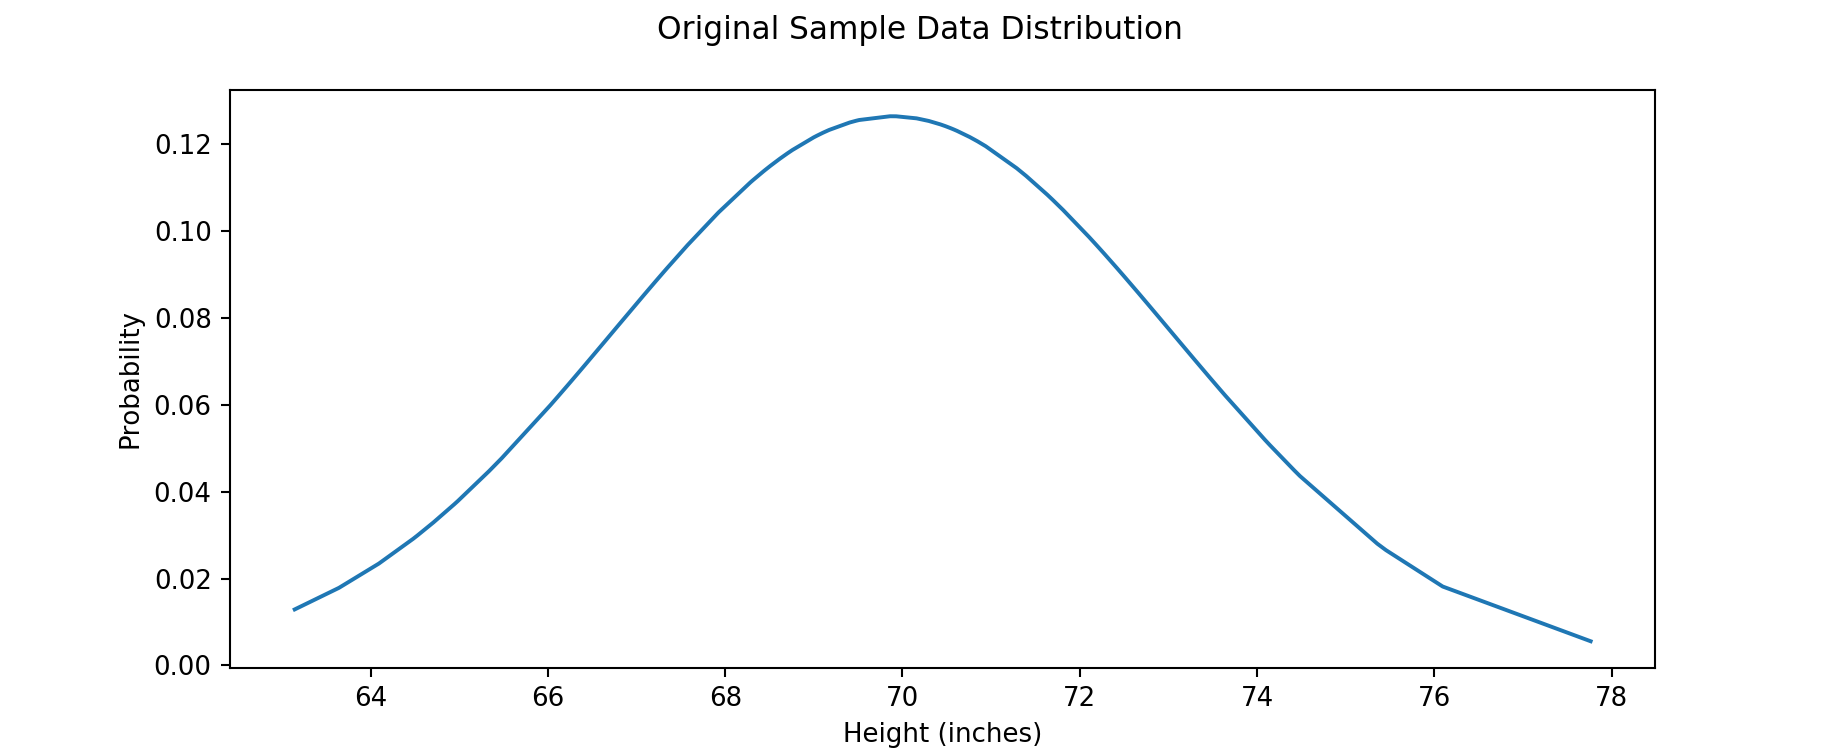

In [560]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Original Sample Data Distribution')

visualize_distribution(height_data, ax)

Based on the distribution plot of the original sample data, we can observer that the distribution looks like Gaussian. However, the fact that it looks like Gaussian does not matter at all when Bootstrapping, because Bootstrapping does not assume anything about the distribution. 

### 1.2 Resampling From the Sample Data

Each Bootstrap resampling (realization) can be done in one-line with [numpy.random.choice()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html). Each realization is an array of size N, where N is the length of the original sample data. There are M number of realizations, where M is an arbitrary number of your choice. 

** Results **

In [516]:
N = height_data.shape[0]     # size of each realiztion
M = 100                      # number of realizations - arbitrary
bootstrap_data = bootstrap_simulation(height_data, N, M)
bootstrap_data.round(1).head(10)

,Real 1,Real 2,Real 3,Real 4,Real 5,Real 6,Real 7,Real 8,Real 9,Real 10,...,Real 91,Real 92,Real 93,Real 94,Real 95,Real 96,Real 97,Real 98,Real 99,Real 100
0,73.6,66.0,71.8,71.3,69.4,67.3,74.1,68.3,68.3,66.1,...,73.5,65.5,74.5,71.8,72.5,74.4,70.8,64.1,73.0,74.1
1,70.5,69.5,67.3,70.6,68.3,68.5,65.0,66.6,63.6,73.3,...,73.6,72.1,67.1,75.4,66.8,71.8,72.3,68.5,69.5,66.1
2,68.5,65.0,72.2,68.3,69.9,64.1,68.3,64.7,73.5,70.6,...,72.9,73.6,74.4,69.0,66.4,66.4,65.0,72.5,72.8,69.4
3,70.8,72.1,73.5,65.0,69.0,69.4,72.2,66.8,68.3,70.6,...,69.9,72.2,70.9,67.2,71.7,64.1,70.5,74.1,69.1,73.0
4,72.9,73.3,68.4,75.5,75.4,68.7,74.5,69.5,64.7,73.6,...,66.8,74.1,70.8,73.6,68.4,65.0,64.5,68.6,71.4,77.8
5,66.8,67.6,72.4,66.0,66.4,74.1,72.2,67.1,72.9,69.1,...,64.7,72.5,64.7,65.3,70.8,69.5,68.8,66.0,70.5,71.7
6,63.1,68.3,68.3,67.3,67.3,75.4,69.2,70.5,65.0,66.3,...,67.6,72.4,69.4,66.2,67.2,67.1,77.8,68.5,72.2,71.3
7,69.0,71.7,70.8,69.2,64.7,68.3,67.1,70.6,73.1,70.5,...,67.3,64.1,72.3,71.3,67.2,74.1,66.2,68.8,73.0,71.3
8,72.5,63.1,68.5,63.6,66.4,72.9,69.5,68.5,65.0,72.5,...,69.5,73.0,70.8,66.3,70.6,67.3,69.2,74.1,69.9,73.5
9,73.1,73.1,71.7,65.0,72.5,71.8,64.9,72.5,73.5,64.5,...,65.5,67.9,69.2,72.2,66.1,73.6,64.5,68.5,75.5,65.3


In [521]:
boot_sum_stats = calc_sum_stats(bootstrap_data)
boot_sum_stats.round(1)

,Real 1,Real 2,Real 3,Real 4,Real 5,Real 6,Real 7,Real 8,Real 9,Real 10,...,Real 91,Real 92,Real 93,Real 94,Real 95,Real 96,Real 97,Real 98,Real 99,Real 100
mean,70.3,70.1,70.1,69.8,69.7,70.0,70.3,69.9,69.3,70.1,...,70.1,70.4,70.6,69.7,69.5,69.8,69.6,69.7,69.7,70.2
std,3.3,3.3,2.9,3.3,3.2,2.9,3.0,3.0,3.2,3.2,...,2.7,3.4,3.3,3.2,3.1,3.1,3.2,3.2,3.0,3.3
min,63.1,63.1,64.5,63.6,63.1,63.6,63.1,63.1,63.6,63.1,...,64.5,63.6,64.5,63.1,63.1,64.1,63.1,63.1,63.1,64.1
max,77.8,77.8,77.8,77.8,75.5,75.5,77.8,77.8,77.8,76.1,...,75.4,77.8,77.8,77.8,76.1,76.1,77.8,76.1,76.1,77.8
variance,10.9,10.6,8.5,10.6,9.9,8.2,9.2,9.2,10.3,10.4,...,7.4,11.9,10.7,10.2,9.8,9.5,10.0,9.9,9.2,10.9
skew,0.1,-0.1,-0.2,-0.0,0.0,-0.3,-0.2,-0.1,0.2,-0.3,...,-0.3,-0.1,-0.1,0.2,-0.1,-0.0,-0.1,-0.1,-0.1,-0.1
kurtosis,-0.3,-0.8,-0.5,-0.7,-1.0,-0.6,-0.6,-0.7,-0.7,-0.8,...,-0.8,-0.9,-0.5,-0.9,-0.9,-1.1,-0.6,-0.8,-0.8,-0.6
IQR,5.0,5.0,4.4,5.7,5.4,4.0,4.6,5.2,5.2,4.9,...,4.4,4.8,4.5,5.4,5.3,5.6,5.1,5.0,4.5,4.8


** Visualize **

<IPython.core.display.Javascript object>


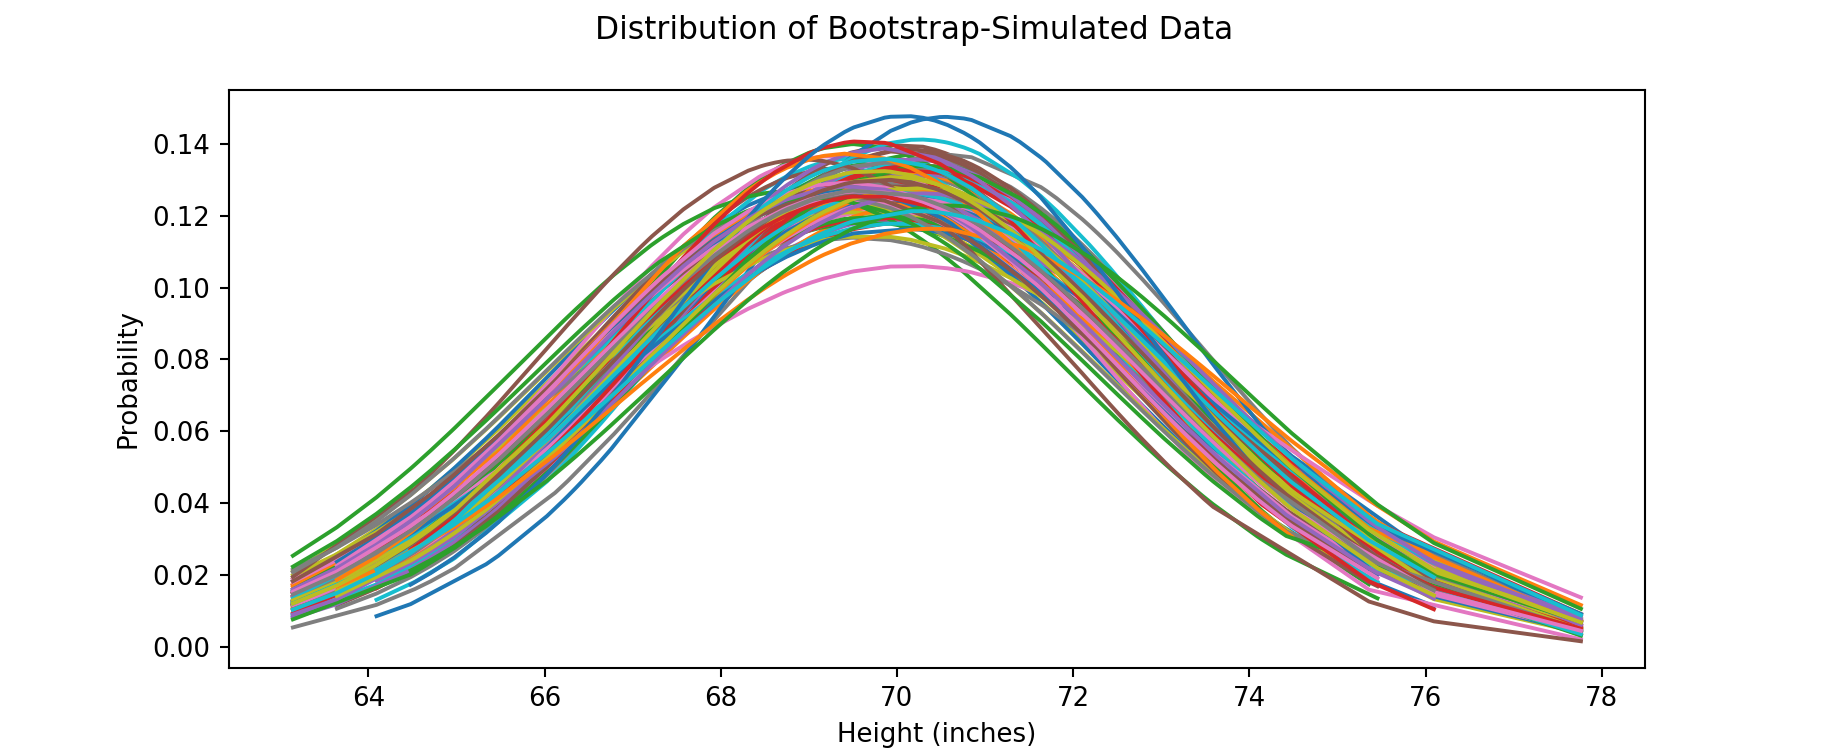

In [565]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Distribution of Bootstrap-Simulated Data')
visualize_distribution(bootstrap_data, ax);

<div class="alert alert-info">
    <p>Each line in the plot represents one Bootstrap realization</p> 
</div>

### 1.3 Uncertainty Models in Summary Statistics with Blox Plots

<IPython.core.display.Javascript object>


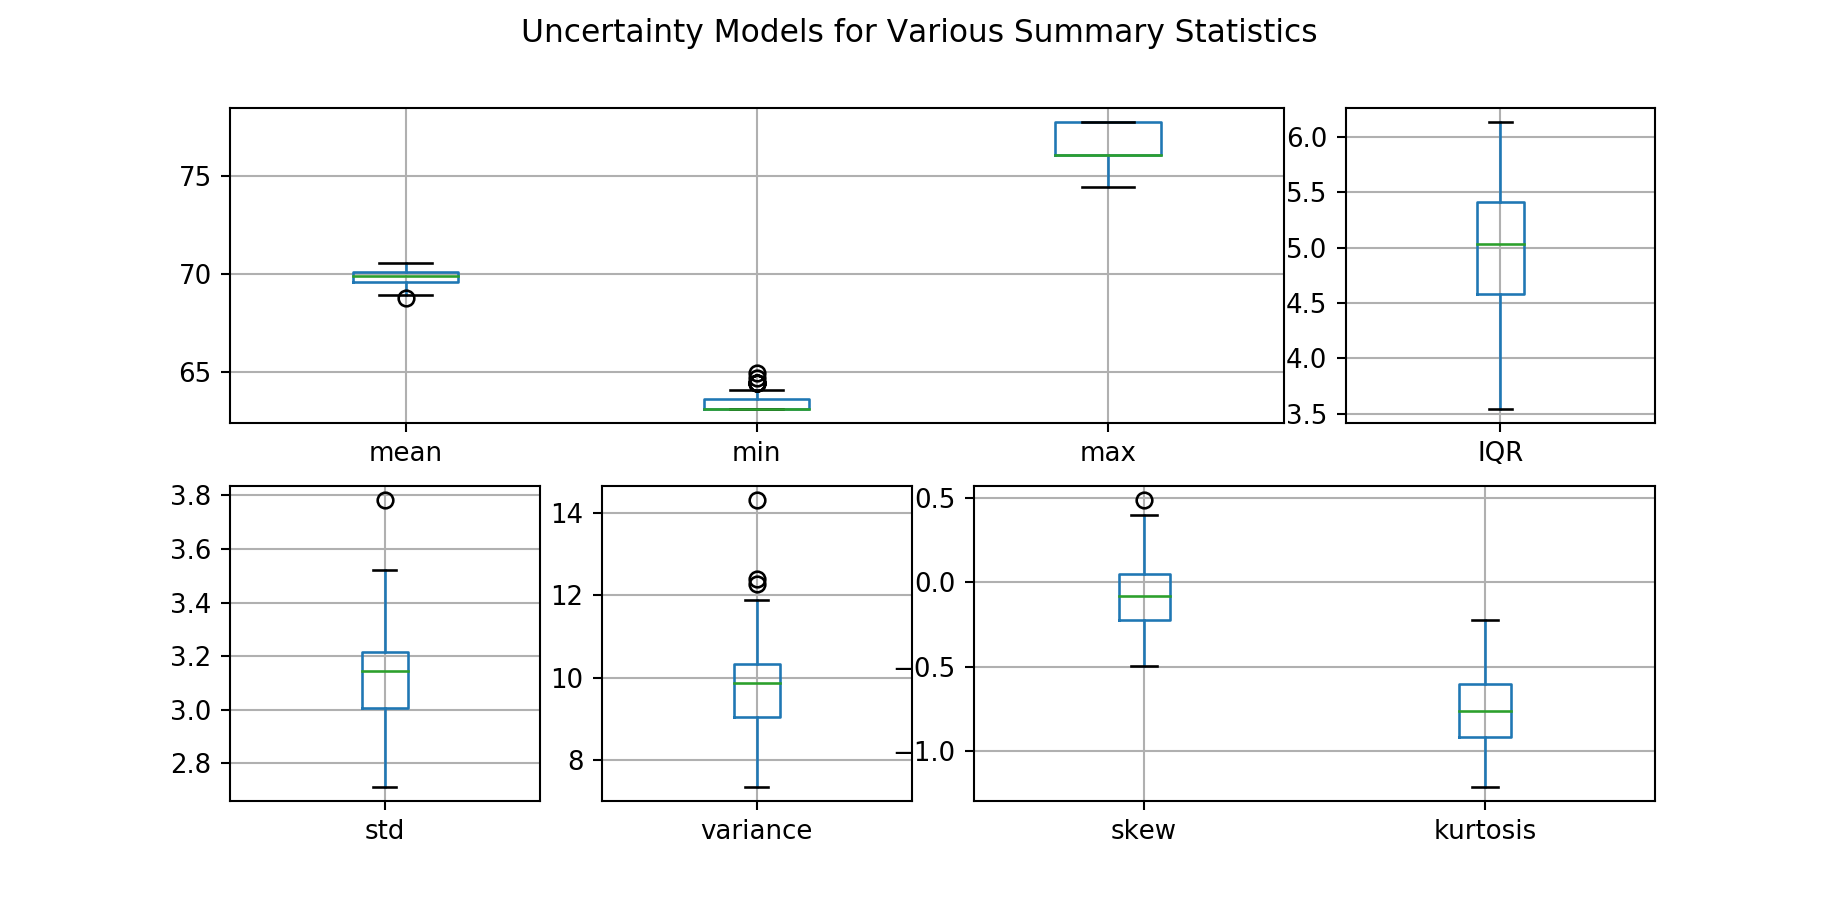

In [558]:
f = plt.figure()
plt.suptitle("Uncertainty Models for Various Summary Statistics")

gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, 0:3])
ax2 = plt.subplot(gs[0, 3])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[1, 2:4])

boot_sum_stats.T[['mean', 'min', 'max']].boxplot(ax=ax1)
boot_sum_stats.T[['IQR']].boxplot(ax=ax2)
boot_sum_stats.T[['std']].boxplot(ax=ax3)
boot_sum_stats.T[['variance']].boxplot(ax=ax4)
boot_sum_stats.T[['skew', 'kurtosis']].boxplot(ax=ax5)

fig.suptitle('Uncertainty Models for Various Statistics: Male Height');

### 1.4 Confidence Interval in Summary Statistics

** Confidence Intervals of Population Parameters **

Confidence intervals of summary statistics usually have a confidence level of 90%, 95%, or 99%. In this case, we will choose 95% confidence level. 

In [335]:
conf_int = df_male_summary.describe(percentiles=[0.025, 0.5, 0.975]).iloc[4:7, :].T
conf_int.columns = ['P2.5', 'P50', 'P97.5']
conf_int.round(1)

,P2.5,P50,P97.5
mean,69.5,69.7,69.9
std,2.8,2.9,3.0
min,58.0,60.3,61.9
max,77.6,79.1,81.4
variance,7.8,8.4,9.2
skew,-0.1,0.0,0.2
kurtosis,-0.2,0.0,0.3


Based on the **P2.5, P50, P97.5** values, the following statement can be formulated:

<div class="alert alert-info">
    <p>By 95% chance, the following statistics will fall within the range of:
    <br><b>Mean : </b>69.5 ~ 69.9, with 69.7 being the average
    <br><b>Standard Deviation : </b>2.8 ~ 3.0 with 2.9 being the average
    <br><b>Min : </b>58.0 ~ 61.9, with 60.3 being the average
    <br><b>Max : </b>77.6 ~ 81.4, with 79.1 being the average
    <br><b>Variance : </b>7.8 ~ 9.2, with 8.4 being the average
    <br><b>Skew : </b>-0.1 ~ 0.2, with 0.0 being the average
    <br><b>Kurtosis : </b>-0.2 ~ 0.3, with 0.0 being the average</p>
</div>

## 1.B Confidence Interval in Population Parameters: Rock Permeability Example

The previous example, the US male height distribution, 

<p><center><b>Bootstrap can obtain confidence interval in any statistics</b></center></p>

It can provide confidence interval in virtually any statistical values (mean, standard deviation, skewness, kurtosis, etc..), when the formula to calculate them is unknown. Let's assume that you want to obtain an uncertainty model for the weights of 5th-grade students in a region. If you know the weight distribution of the students from some type of a government statistic report, you can implement *Monte-Carlo Simulation* to generate virtually unlimited number of random samples. This one Monte-Carlo simulation contains N number of random samples, and summary statistics can be drawn from this data. Mean, standard deviation, min, max, P10, or P90 values can be obtained. However, how sure do you feel about these summary statistics? What is the uncertainty in these values? 

For example, from a single Monte-Carlo simulation, you found out that the mean ($\mu$) weight of the US 5th-grade boys is 80 lbs. How can you obtain the uncertainty in the mean weight of the students? The answer is simple: you perform Monte-Carlo simulation hundreds of times, and obtain hundreds of mean values. Since there is a large enough number of mean values, reliable P10 and P90 values can be obtained to draw an uncertainty model for the mean weight of the students. You will end up with something like $\mu$ = 80 $\pm$ 3 lbs.

What if you want to get an uncertainty model for the standard deviation ($\sigma$) of the weight of the students? It's the same: you performn Monte-Carlo simulation hundreds of times, and obtain hundreds of standard deviation values. Then obtain P10 and P90 values of your collection of standard deviations, and draw an uncertainty model for it. You will end up with something like $\sigma$ = 6 $\pm$ 1.3 lbs.

<p><center><b>Bootstrap does not assume anything about the distribution of a population</b></center></p>

Bootstrapping is tied to Monte-Carlo simulation in a sense that it is similar to performing Monte-Carlo simulation many times (recall that Monte-Carlo simulation is performing *random sampling* many times). However, Monte-Carlo simulation requires knowledge about the distribution shape, mean, and standard deviation of the population to generate random samples. What if you do not have any knowledge of those values? 

Bootstrapping is a type of a *resampling* method. You pick a random value from a sample pool N times **with replacement**, and create M number of new Bootstrapped-sample pools. The term **with replacement** here means that you put back the sample you drew to the original sample pool after adding it to a new Bootstrapped-sample pool. Thick of it this way: you randomly choose a file from a folder in your PC, and you *copy* and paste the randomly-chosen file into a new directly. You do not *cut* and paste the file, but you *copy* and paste file. You will end up with N x M matrix of samples, where M is the number of Bootstrap sample pools, and N is the number of random samples in a Bootstrap sample pool.

Because all Bootstrapping is doing is just *resampling* the data by choosing random values from a sample pool, it does not assume anything about the distribution. You do not know to know the distribution parameters of the population to generate random samples.

<p><center><b>Bootstrap can be helpful when there are too few samples</b></center></p>

Ideally, you would want to draw large, non-repeated, samples from a population in order to create a sampling distribution for a statistic. However, you may be limited to one sample because of finances or time. This single sample method can serve as a mini population, from which repeated small samples are drawn with replacement over and over again. As well as saving time and money, bootstrapped samples can be quite good approximations for population parameters.


In [ ]:
## 1.A Confidence Interval in Population Parameters: US Male Height Examplecensus_data = pd.DataFrame(data=[[69.7, 64.3], [2.9, 2.6]], columns=['Male (inches)', 'Female (inches)'], index=['mean', 'stdev'])
census_data